# The Central Limit Theorem

Some illustrations of the CLT via simulations, using a uniform distribution as the original population.

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from scipy.stats import norm

In [25]:
plt.style.use('seaborn')
sns.set_context('talk', font_scale=1.4)
plt.rcParams['figure.figsize'] = (12, 8)

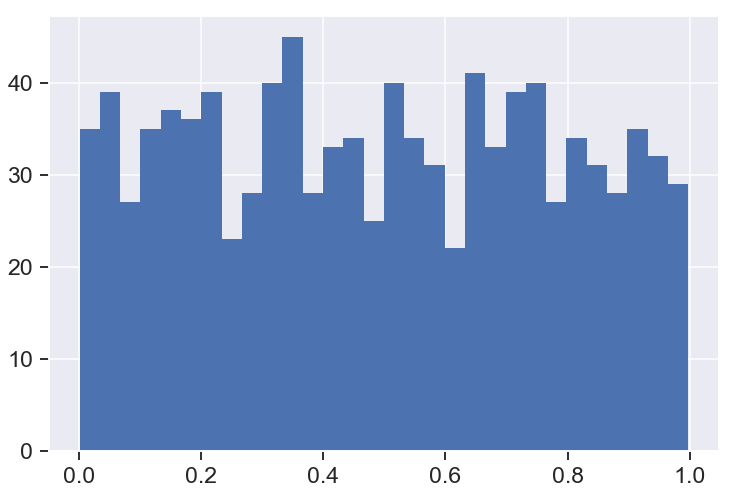

In [9]:
a = np.random.uniform(size=1000)
plt.hist(a, bins=30);

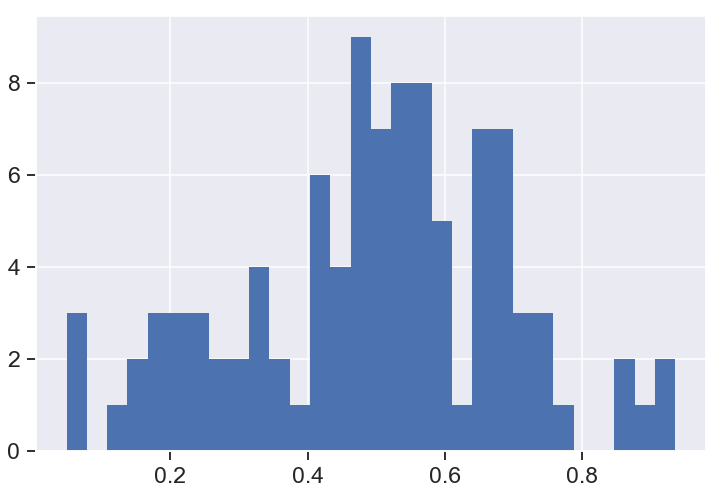

In [16]:
sample_size = 2
repetitions = 100
b = np.random.uniform(size=(sample_size, repetitions))
bav = b.mean(axis=0)
plt.hist(bav, bins=30);

In [48]:
np.random.uniform(size=(2, 10000)).mean(axis=0).var()

0.042278892592011029

In [46]:
1/24

0.041666666666666664

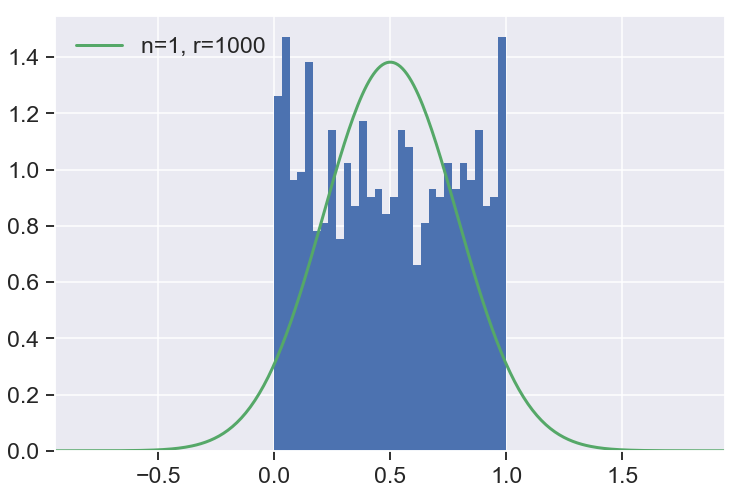

In [20]:
def cl_sample(sample_size, repetitions, ax=None, bins=None):

    bins = 30 if bins is None else bins
    if ax is None:
        fig, ax = plt.subplots()
    
    # mean and variance of the uniform (0,1) distribution
    mu = 0.5
    sigma2_uni = 1/12
    sigma_norm = np.sqrt(sigma2_uni/sample_size)

    sample_means = np.random.uniform(size=(sample_size, repetitions)).mean(axis=0)
    print(np.random.uniform(size=(sample_size, repetitions)).)
    assert sample_means.size == repetitions  # sanity check
   
    xmin_n, xmax_n = mu-5*sigma_norm, mu+5*sigma_norm
    xmin = min(0, xmin_n)
    xmax = max(1, xmax_n)
    x = np.linspace(xmin, xmax, 300)    
    ax.hist(sample_means, density=True, bins=bins);
    ax.plot(x, norm.pdf(x, mu, sigma_norm), lw=3, label=f'n={sample_size}, r={repetitions}')
    ax.set_xlim([xmin, xmax])
    ax.legend()
    return ax

cl_sample(1, 1000);

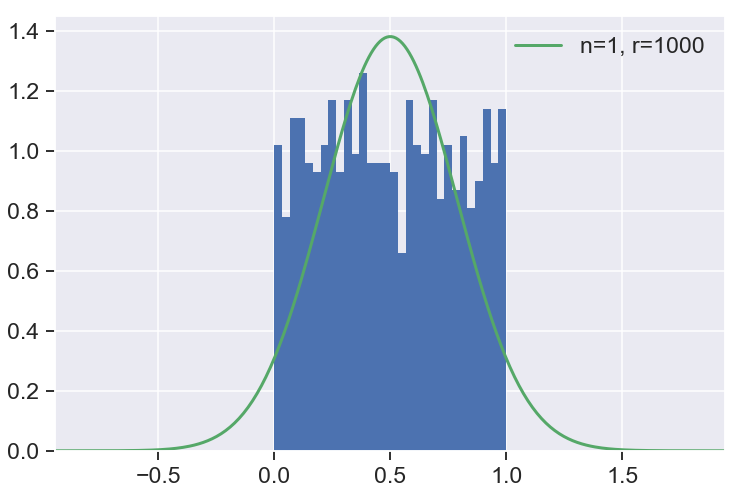

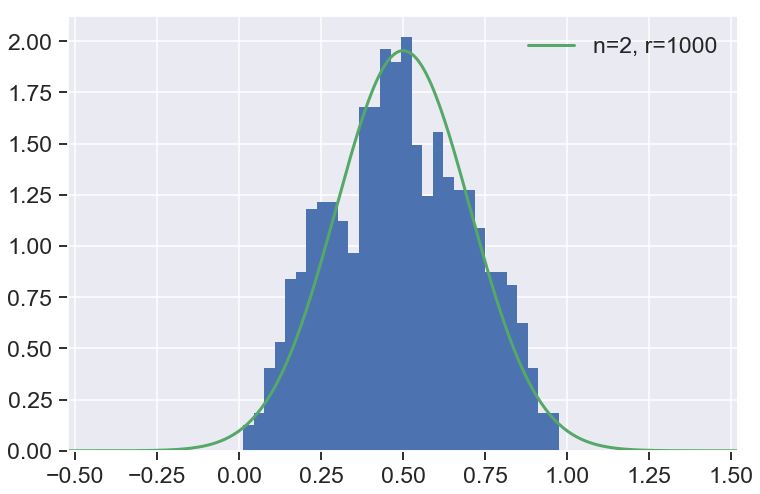

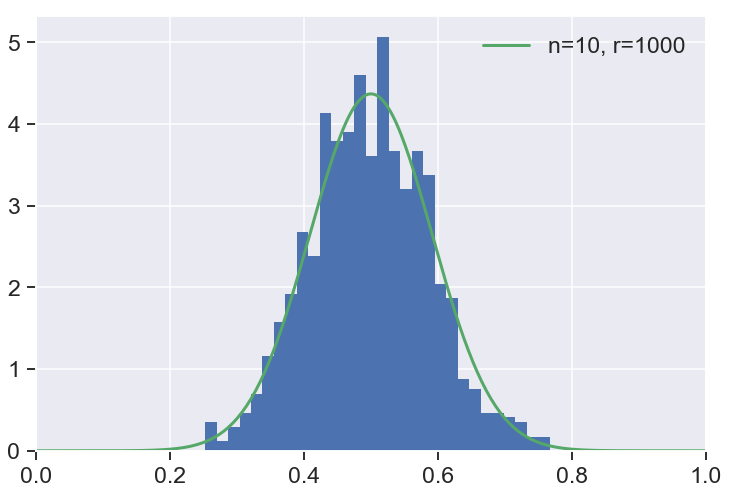

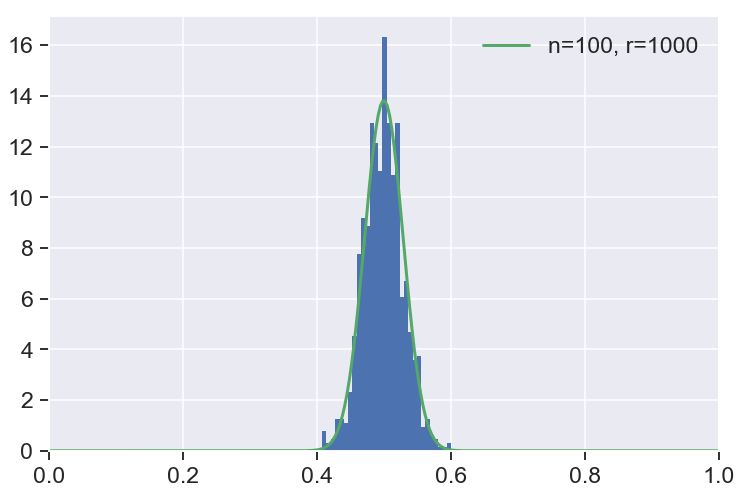

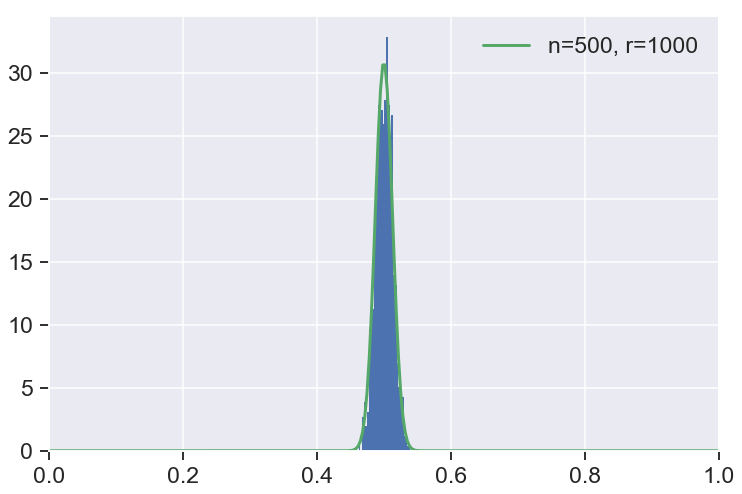

In [21]:
reps = 1_000
for sample_size in [1, 2, 10, 100, 500]:
    cl_sample(sample_size, reps)

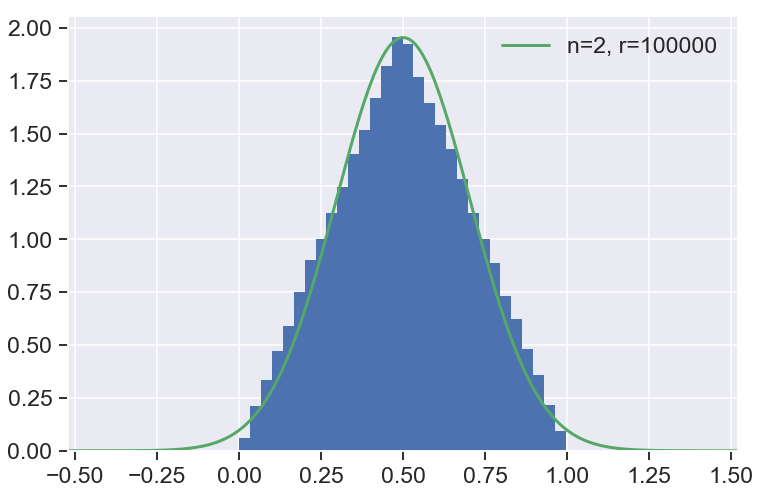

In [49]:
cl_sample(2, 100000);

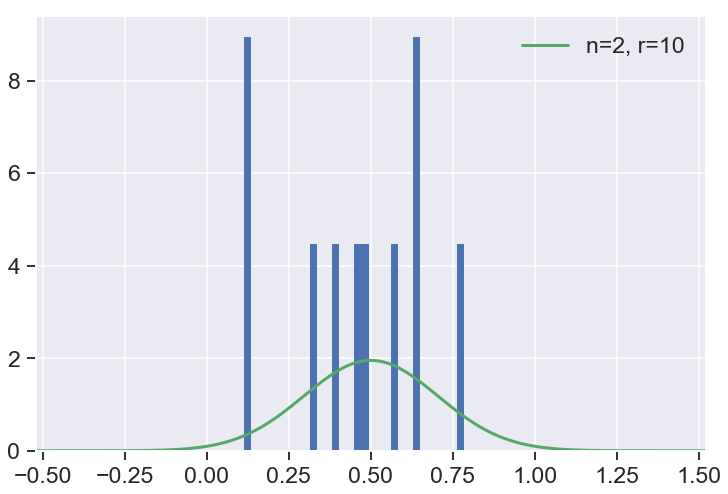

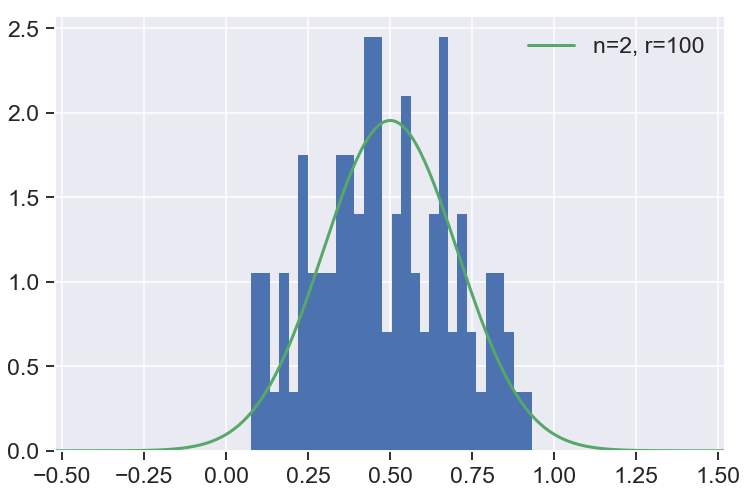

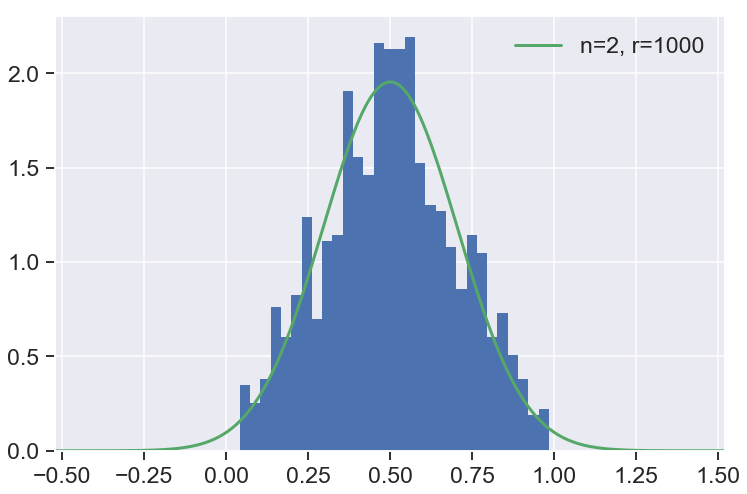

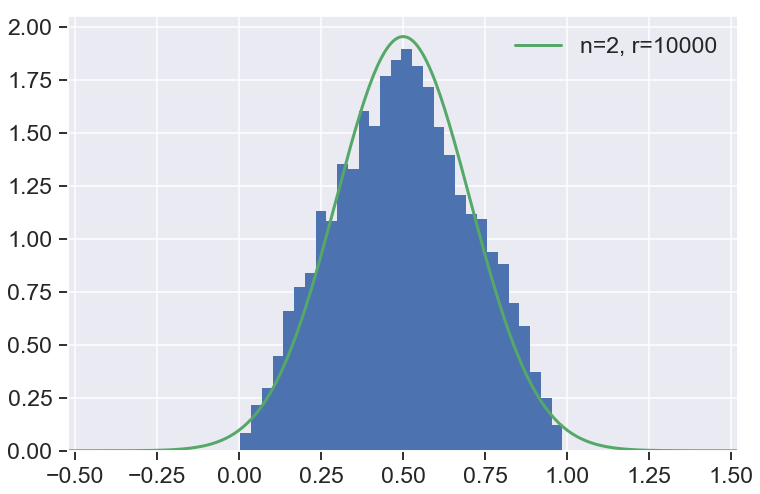

In [33]:
for reps in [10, 100, 1000, 10000]:
    cl_sample(2, reps)

Let $Z = \frac{(X_1 + X_2)}{2} $, then the pdf of $Z$ is
$$
f_{z}(z)=\left\{\begin{array}{ll}{4 z,} & {0<z<\frac{1}{2}} \\ {4-4 z,} & {\frac{1}{2}<z<1}\end{array}\right.
$$
which has a shape like this

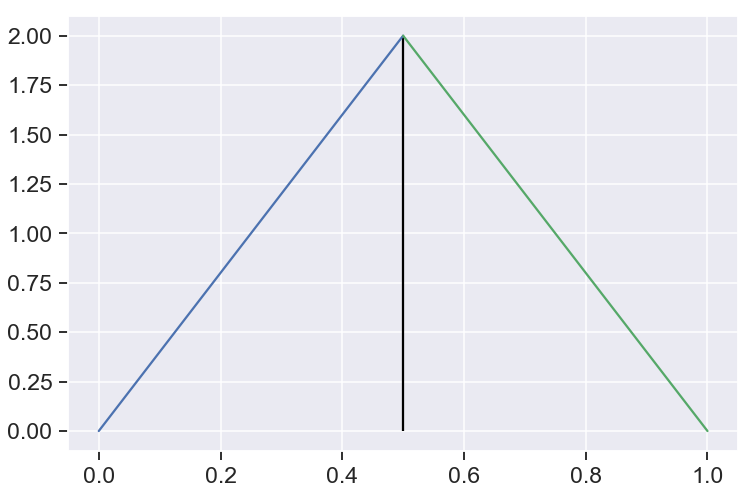

In [57]:
z1 = np.linspace(0, 1/2, 100)
f1z = 4 * z1
z2 = np.linspace(1/2, 1, 100)
f2z = 4 - 4 * z2
plt.plot(z1, f1z)
plt.plot(z2, f2z)
plt.vlines(x=0.5, ymin=0, ymax=2);

As we can see from above, `cl_sample(2, 10000)` looks like the triangle as desired.

# The Law of Large Numbers

In [22]:
n_samples = 2_000
n = np.arange(1, n_samples+1)
n_reps = 50
runs = np.random.uniform(size=(n_reps, n_samples))
r_av = runs.cumsum(axis=1)/n
r_av.shape

(50, 2000)

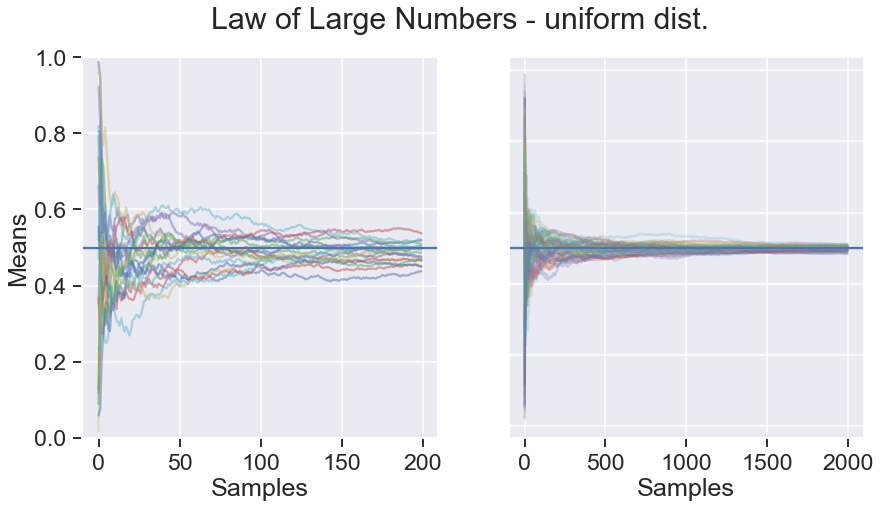

In [23]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))

for run in r_av[:20]:
    ax1.plot(run[:200], alpha=0.5)

for run in r_av:
    ax2.plot(run, alpha=0.25)

ax1.axhline(0.5);  # expected mean of the 0-1 uniform distribution
ax2.axhline(0.5);  # expected mean of the 0-1 uniform distribution

ax1.set_ylim(0, 1)
ax2.set_yticklabels([])
ax2.yaxis.set_ticks_position('none')

f.suptitle("Law of Large Numbers - uniform dist.")
ax1.set_ylabel("Means")
ax1.set_xlabel("Samples")
ax2.set_xlabel("Samples");
f.savefig("large_num.png", dpi=200)

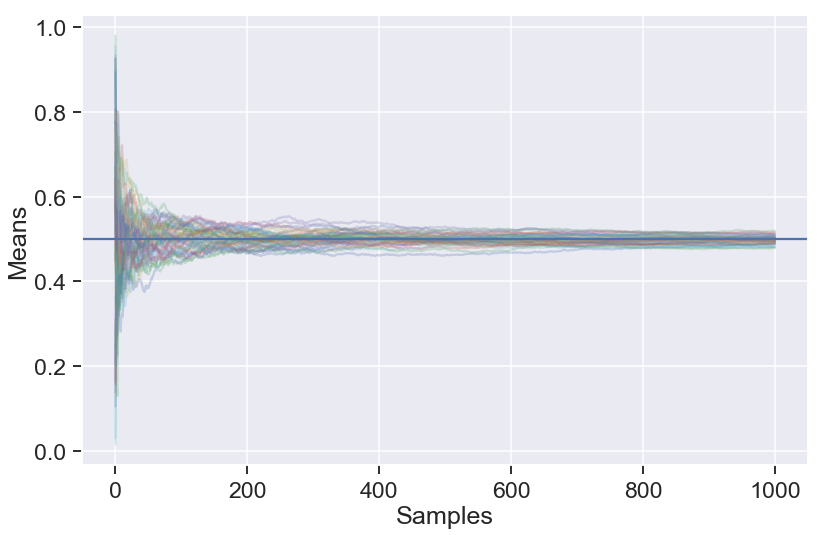

In [72]:
f, ax1 = plt.subplots()

for run in r_av:
    ax1.plot(run[:1000], alpha=0.25)

ax1.axhline(0.5);  # expected mean of the 0-1 uniform distribution

#f.suptitle("Law of Large Numbers - uniform dist.")
ax1.set_ylabel("Means")
ax1.set_xlabel("Samples")
plt.tight_layout()
f.savefig("large_num_all.png", dpi=200)